Navid Azadegan 

In [151]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly
#pd.set_option('display.max_rows', 500 )
pd.options.display.max_rows=500
%matplotlib inline

Data Gathering

In [152]:
data_path1='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_path2='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
data_path3='file:///C:/Users/navid/covid/data/raw2/COVID-19/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv'
pd_raw1=pd.read_csv(data_path1)
pd_raw2=pd.read_csv(data_path2)
pd_raw3=pd.read_csv(data_path3)
pd_raw3

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,124.0,NaN
1,World,2020-12-14,5.000000e+00,0.000000e+00,0.000000e+00,2020-12-14,NaN,NaN
2,Canada,2020-12-15,7.230000e+02,0.000000e+00,0.000000e+00,2020-12-15,124.0,NaN
3,China,2020-12-15,1.500000e+06,0.000000e+00,0.000000e+00,2020-12-15,156.0,NaN
4,Russia,2020-12-15,2.850000e+04,2.850000e+04,0.000000e+00,2020-12-15,643.0,NaN
...,...,...,...,...,...,...,...,...
249133,West Bank and Gaza,2022-06-08,3.723499e+06,NaN,NaN,2022-06-09,275.0,NaN
249134,World,2022-06-08,1.153978e+10,4.884697e+09,4.448682e+09,2022-06-09,NaN,NaN
249135,Yemen,2022-06-08,8.386210e+05,6.727940e+05,4.297210e+05,2022-06-09,887.0,NaN
249136,Zambia,2022-06-08,3.478542e+06,3.240892e+06,3.878201e+06,2022-06-09,894.0,NaN


Data Preparation

In [153]:
pd_raw1.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/5/22', '5/6/22', '5/7/22', '5/8/22', '5/9/22', '5/10/22', '5/11/22',
       '5/12/22', '5/13/22', '5/14/22'],
      dtype='object', length=844)

In [154]:
Time_indx3=np.array(pd_raw3[pd_raw3.Country_Region=='World'].Date)

In [155]:
Time_indx=pd_raw1.columns[4:]


In [156]:
df_plot=pd.DataFrame({'data':Time_indx})
df_plot3=pd.DataFrame({'data':Time_indx3})


#df_plot3.head()
#pd_raw['Country/Region'].unique()
#df_plot3

In [157]:
Country_list=['Iran',
              'Germany',
              'China']

In [158]:
for each in Country_list:
   df_plot3[each]=np.array(pd_raw3[pd_raw3.Country_Region=='World'].People_fully_vaccinated)

In [159]:
for each in Country_list:
    Country_Population=max(pd_raw2[pd_raw2['Country_Region']==each].Population)
    df_plot[each]=np.array(pd_raw1[pd_raw1['Country/Region']==each].iloc[:,4::].sum(axis=0)/Country_Population)
   


In [160]:
df_plot.head()

,data,Iran,Germany,China
0,1/22/20,0.0,0.0,3.881628e-07
1,1/23/20,0.0,0.0,4.554538e-07
2,1/24/20,0.0,0.0,6.516602e-07
3,1/25/20,0.0,0.0,9.959068e-07
4,1/26/20,0.0,0.0,1.469777e-06


<AxesSubplot:xlabel='data'>

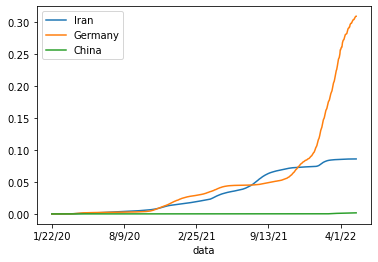

In [161]:

df_plot.set_index('data').plot()

In [162]:
df_plot3.head()

,data,Iran,Germany,China
0,2020-12-14,0.0,0.0,0.0
1,2020-12-15,0.0,0.0,0.0
2,2020-12-16,0.0,0.0,0.0
3,2020-12-17,0.0,0.0,0.0
4,2020-12-18,0.0,0.0,0.0


<AxesSubplot:xlabel='data'>

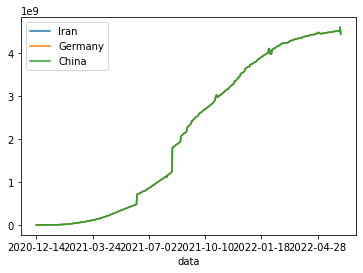

In [163]:
df_plot3.set_index('data').plot()

Data Type (4.2)

In [167]:
datetime.strptime(df_plot.data[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

Data Arragging (5.1)

Ploting (5.2)

In [168]:
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()